In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
ROOT_DIR = os.getcwd()
DIR_PROJECT = ROOT_DIR +'\Imagens Utilizadas'
""" for dirname, _, filenames in os.walk(DIR_PROJECT):
    for filename in filenames:
        print(os.path.join(dirname, filename)) """

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

' for dirname, _, filenames in os.walk(DIR_PROJECT):\n    for filename in filenames:\n        print(os.path.join(dirname, filename)) '

In [3]:
import zipfile
import os
%pip install tensorflow
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold



## Prepare Data


In [5]:
train_dir = DIR_PROJECT+"/train"
os.listdir(train_dir)

['COVID19', 'NORMAL']

In [6]:
test_dir = DIR_PROJECT+"/test"
os.listdir(test_dir)

['COVID19', 'NORMAL']

In [7]:
print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))



400
400


In [8]:
print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))



100
100


## Observing a sample image of each X-ray class


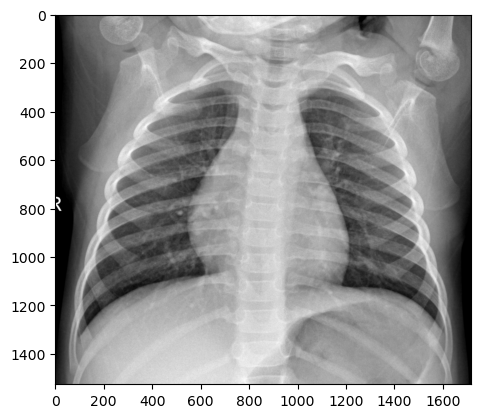

In [9]:
normal_sample = imread(train_dir+"/NORMAL"+"/NORMAL(976).jpg")
plt.imshow(normal_sample)


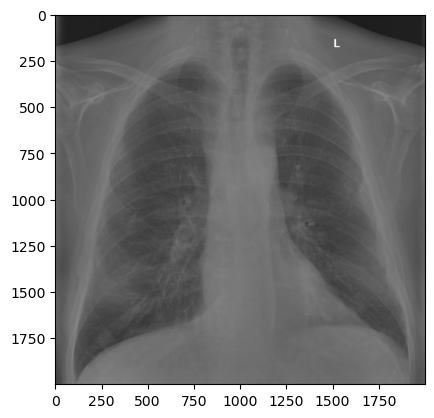

In [10]:
covid_sample = imread(train_dir+"/COVID19"+"/COVID19(187).jpg")
plt.imshow(covid_sample, cmap= "gray")


In [11]:
image_size = (400,400,3)



## Image generator


## Training generator

In [12]:
train_generator = tf.keras.utils.image_dataset_from_directory (
    train_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['COVID19', 'NORMAL'],
    batch_size=32,
    shuffle=True,
    interpolation='nearest',
)

Found 800 files belonging to 2 classes.


## Testing generator

In [13]:
test_generator =tf.keras.utils.image_dataset_from_directory (
    test_dir,
    image_size=image_size[:2],
    color_mode='rgb',
    class_names=['NORMAL', 'COVID19'],
    batch_size=32,
    shuffle=False,
    interpolation='nearest',
)

Found 200 files belonging to 2 classes.


In [14]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)
train_images = np.concatenate(list(train_generator.map(lambda x, y:x)))
train_labels = np.concatenate(list(train_generator.map(lambda x, y:y)))

val_images = np.concatenate(list(test_generator.map(lambda x, y:x)))
val_labels = np.concatenate(list(test_generator.map(lambda x, y:y)))

inputs = np.concatenate((train_images, val_images), axis=0)
targets = np.concatenate((train_labels, val_labels), axis=0)

kfold = KFold(n_splits=5, shuffle=True)

## Creating Model 2
### CNN with KFOLd

In [27]:
melhor_treino_medio=list()
melhor_history_medio=list()
melhor_scores_medio = list()
for train, test in kfold.split(inputs, targets):
  
  model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=image_size),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(filters = 32, padding = "same", kernel_size = (3,3), strides = (3,3), activation = "relu"),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 1024, activation = "relu"),
  tf.keras.layers.Dense(units = 10, activation = "sigmoid")])

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=30,
              callbacks=[stop])
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  melhor_treino_medio.append(model)
  melhor_history_medio.append(history)
  melhor_scores_medio.append(scores)

d:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


d:\Anaconda\Lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 235ms/step - accuracy: 0.4052 - loss: 1.2454
Epoch 2/30


d:\Anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.4943 - loss: 0.7042
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - accuracy: 0.5212 - loss: 0.7030
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.6112 - loss: 0.6681
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.6464 - loss: 0.6422
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.6703 - loss: 0.6173
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.7319 - loss: 0.5895
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.6920 - loss: 0.5893
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.7595 - loss: 0.5226
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.8069 - loss: 0.4616
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.7974 - loss: 0.4597
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.8293 - loss: 0.3736
Epoch 13/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accurac

## Mean model by a accuracy mean

In [28]:
from statistics import mean
valor_medio=0
for modelo in melhor_history_medio:
    valor_medio+=mean(modelo.history['accuracy'])
valor_medio=valor_medio/len(melhor_history_medio)
valor_medio
final=[]
for i,modelo in enumerate(melhor_history_medio):
    if mean(modelo.history['accuracy'])>=valor_medio:
        print(i,modelo,mean(modelo.history['accuracy']))
        final.append(mean(modelo.history['accuracy']))
final=max(final)
count=0
for i,modelo in enumerate(melhor_history_medio):
    if mean(modelo.history['accuracy'])==final:
        final=modelo
        count=i
        print(i)
        break
history=final
model=melhor_treino_medio[count]
scores=melhor_scores_medio[count]

1 <keras.src.callbacks.history.History object at 0x000001D1A3F1C850> 0.8557499994834264
2 <keras.src.callbacks.history.History object at 0x000001D1A599F1D0> 0.8607083300749461
3 <keras.src.callbacks.history.History object at 0x000001D1BC6B6E90> 0.8634166657924652
3


In [29]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 400, 400, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 134, 134, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 67, 67, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 23, 23, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1024)           │     3,965,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,959,040 (45.62 MB)

 Trainable params: 3,986,346 (15.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,972,694 (30.41 MB)

## Visualize Training


dict_keys(['accuracy', 'loss'])


<Axes: >

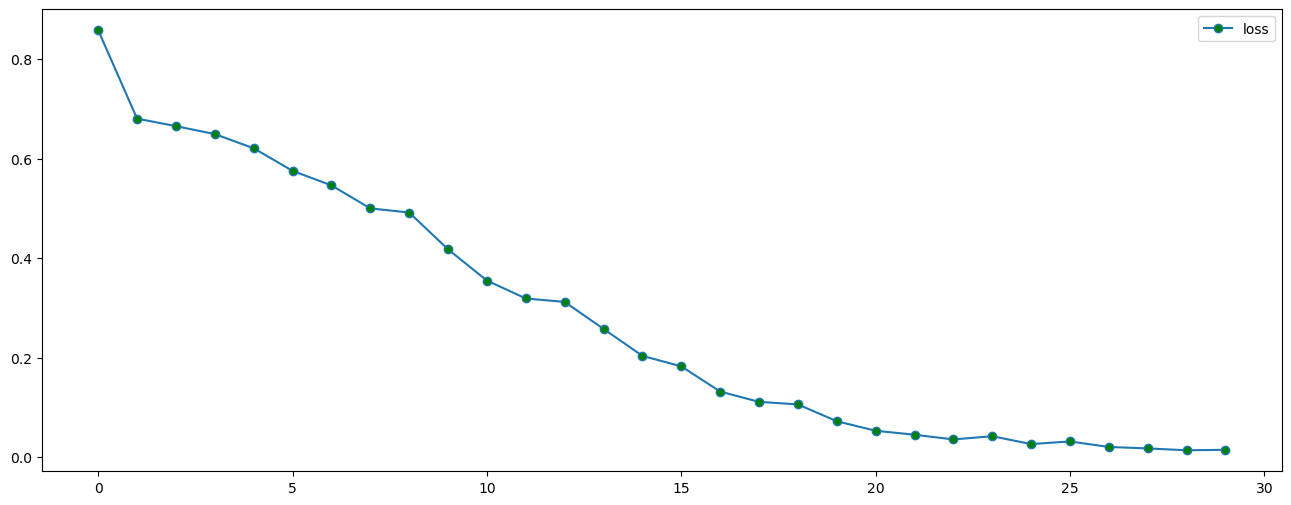

In [30]:
print(history.history.keys())
pd.DataFrame(history.history)[["loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")

<Axes: >

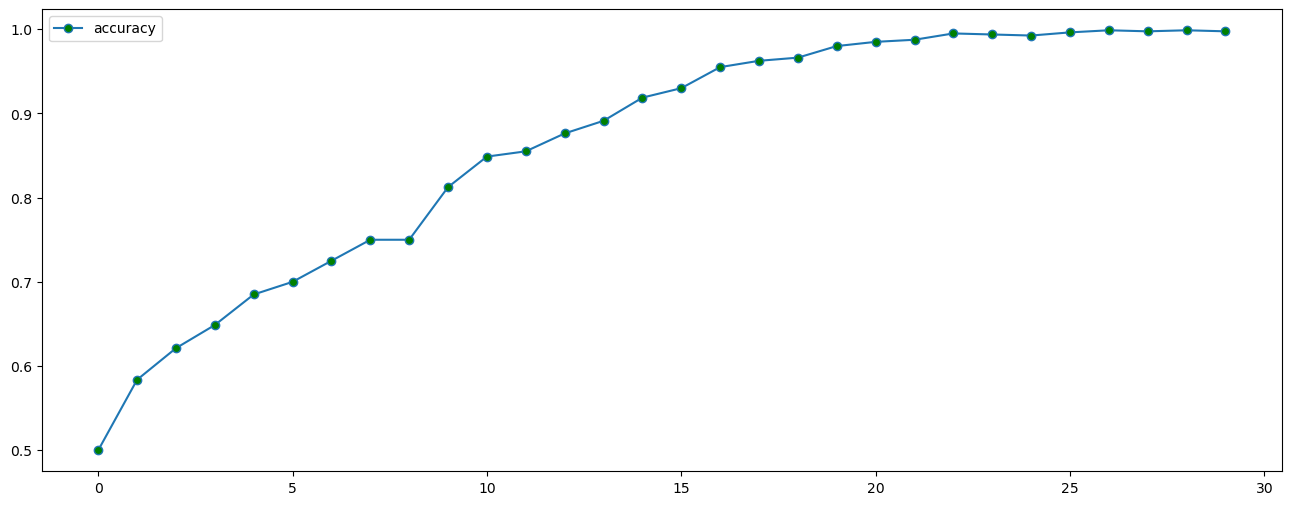

In [31]:
pd.DataFrame(history.history)[["accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")

## predict

In [32]:
predictions = model.predict(test_generator)
predictions



6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/stepWARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D1A8303B00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step


array([[1.0000000e+00, 9.8359460e-01, 1.3634896e-11, ..., 1.2864255e-11,
        4.8480067e-11, 5.4478193e-11],
       [9.9999666e-01, 9.9941534e-01, 3.0825997e-10, ..., 4.2951473e-10,
        1.1601168e-09, 1.2577059e-09],
       [9.9999994e-01, 9.9997479e-01, 7.6260585e-14, ..., 1.1518858e-13,
        7.6461309e-13, 8.4288923e-13],
       ...,
       [9.9507254e-01, 9.9997395e-01, 1.2801857e-08, ..., 3.1740914e-08,
        4.6003152e-08, 5.7883636e-08],
       [9.8673582e-01, 9.9996591e-01, 4.8218148e-08, ..., 1.0497716e-07,
        1.4901210e-07, 1.7651097e-07],
       [9.7643447e-01, 9.9872631e-01, 5.7395791e-06, ..., 1.0358562e-05,
        1.2581626e-05, 1.6447982e-05]], dtype=float32)

In [33]:
pred_labels = np.argmax(predictions, axis = 1)


## Random Image testing


In [34]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]
random_covid_image_name

'COVID19(54).jpg'

In [35]:
covid_img_path = train_dir+"/COVID19/"+random_covid_image_name


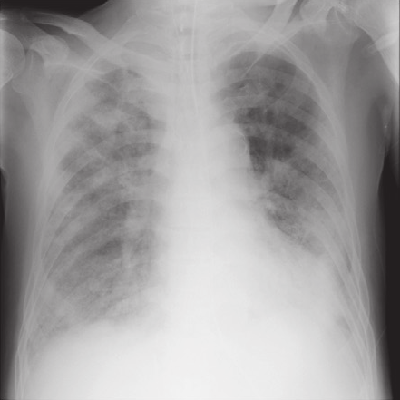

In [36]:
random_covid_img = image.load_img(covid_img_path, target_size=image_size)
random_covid_img

In [37]:
random_covid_img_array = image.img_to_array(random_covid_img)
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)
covid_img_array.shape



(1, 400, 400, 3)

In [40]:
result=np.argmax(model.predict(covid_img_array), axis =1)
result


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([1], dtype=int64)

In [39]:
test_generator.class_names

['NORMAL', 'COVID19']